# Filmes do Adam Sandler

Julia Ortiz       RM-550204
Juliana Maita     RM-99224

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
nf = pd.read_csv('netflix_titles.csv')

In [ ]:
nf.head()

##1- Quais filmes o Adam Sandler participou?

In [ ]:
nf_AdamS = nf[nf['cast'].str.contains('Adam Sandler', na=False)]

#Comando para selecionar apenas a coluna 'title'
nf_AdamS_titles = nf_AdamS[['title']]

# Mostrar apenas a coluna title
print(nf_AdamS_titles)

                                          title
27                                    Grown Ups
1879                            Hubie Halloween
2471                                 Uncut Gems
3753                             Murder Mystery
4482                    ADAM SANDLER 100% FRESH
4912                                The Week Of
5227  The Meyerowitz Stories (New and Selected)
5533                               Sandy Wexler
5846                                The Do-Over
5879                           The Ridiculous 6
6018                             50 First Dates
6164                           Anger Management
6271                            Bedtime Stories
6303                                  Big Daddy
6497                                      Click
7008      Hotel Transylvania 3: Summer Vacation
7316                               Little Nicky
7517                                  Mr. Deeds
8554                               The Waterboy
8790              You Don't Mess with th

## 2- Qual é a distribuição dos gêneros dos filmes de Adam Sandler na Netflix?

27                     Comedies
1879    Comedies, Horror Movies
2471          Dramas, Thrillers
3753                   Comedies
4482            Stand-Up Comedy
Name: listed_in, dtype: object


<ipython-input-7-2f710d9bc803>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandler_movies['listed_in'] = sandler_movies['listed_in'].str.split(', ').copy()
<ipython-input-7-2f710d9bc803>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')


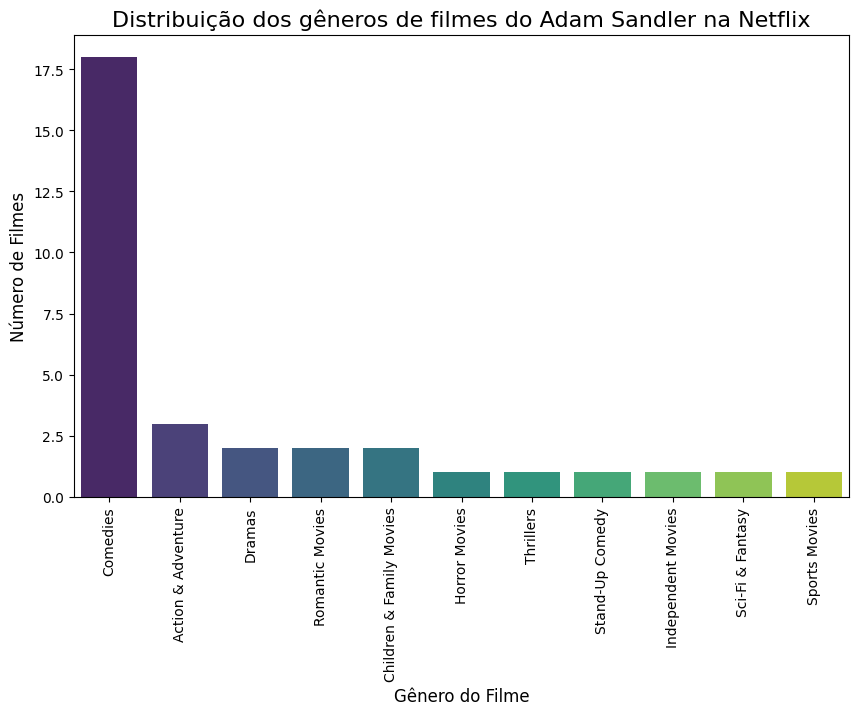

In [ ]:
# Selecionar os filmes do Adam Sandler
sandler_movies = nf[nf['cast'].str.contains('Adam Sandler', na=False)]

# Verificar o conteúdo da coluna listed_in
print(sandler_movies['listed_in'].head())

# Separar os tipos de filmes por categoria e usar .copy() para evitar o SettingWithCopyWarning
sandler_movies['listed_in'] = sandler_movies['listed_in'].str.split(', ').copy()

sandler_movies_exploded = sandler_movies.explode('listed_in')

# Calcular a frequência de cada gênero de filme
type_counts = sandler_movies_exploded['listed_in'].value_counts()

# Visualizar os dados com um gráfico de barras usando (Seaborn)
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')


plt.xticks(rotation=90)

plt.xlabel('Gênero do Filme', fontsize=12)
plt.ylabel('Número de Filmes', fontsize=12)
plt.title('Distribuição dos gêneros de filmes do Adam Sandler na Netflix', fontsize=16)

plt.show()

##3- Qual é a média de avaliação dos filmes de Adam Sandler ao longo dos anos?

7 valores NaN encontrados em 'rating'.


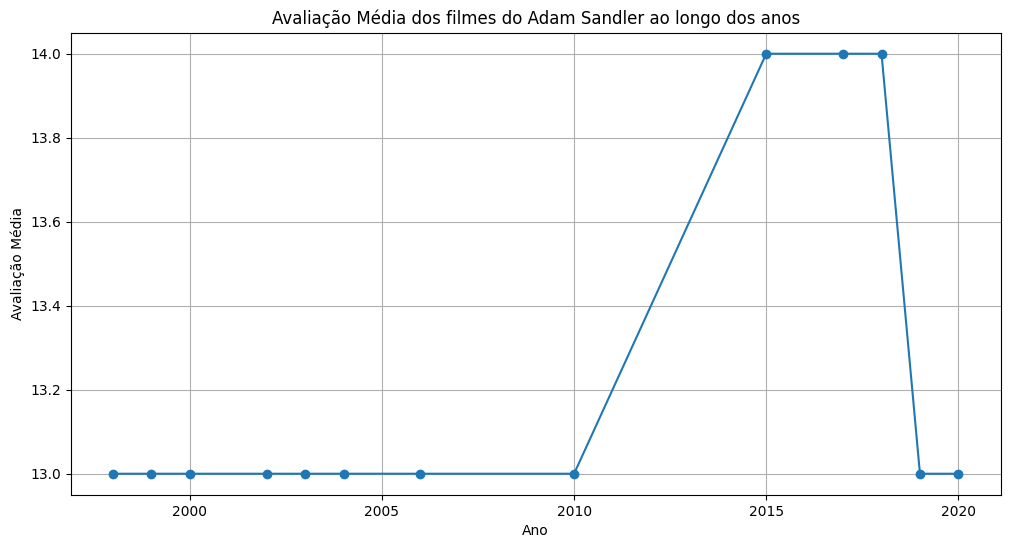

In [ ]:
# Filtrar os filmes onde Adam Sandler está no elenco
sandler_movies = nf[nf['cast'].str.contains('Adam Sandler', na=False)].copy()

# Converter 'release_year' para datetime para extrair o ano
sandler_movies['release_year'] = pd.to_datetime(sandler_movies['release_year'], format='%Y', errors='coerce')
sandler_movies['year'] = sandler_movies['release_year'].dt.year

# Converter 'rating' para numérico para extrair números e forçar erros a NaN
sandler_movies['rating'] = pd.to_numeric(sandler_movies['rating'].str.extract('(\d+\.?\d*)')[0], errors='coerce')

# Verificar se há valores NaN
print(sandler_movies['rating'].isna().sum(), "valores NaN encontrados em 'rating'.")

# Comando para calcular a média das avaliações por ano
average_ratings_per_year = sandler_movies.groupby('year')['rating'].mean().dropna()

# Dados com Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(average_ratings_per_year.index, average_ratings_per_year.values, marker='o')
plt.xlabel('Ano')
plt.ylabel('Avaliação Média')
plt.title('Avaliação Média dos filmes do Adam Sandler ao longo dos anos')
plt.grid(True)
plt.show()


## 4- Existe uma relação entre a duração dos filmes e sua avaliação?

0 valores NaN encontrados em 'duration'.


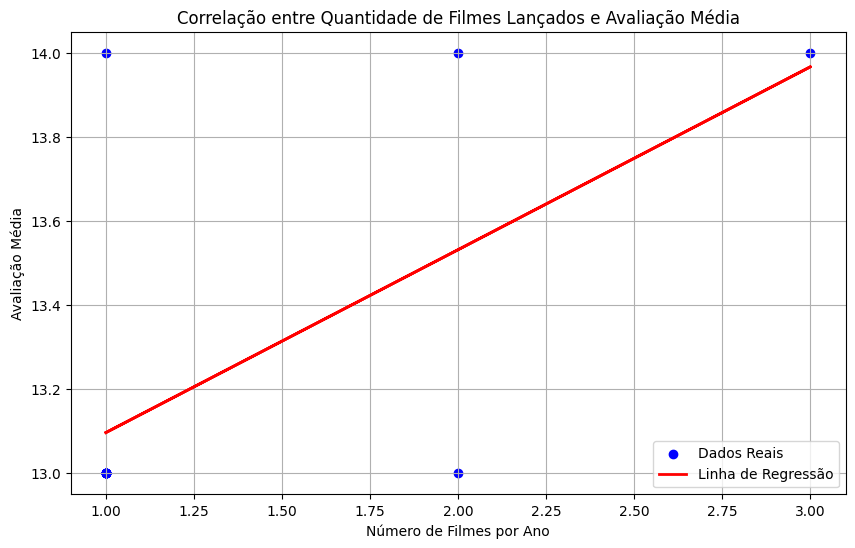

Coeficiente de Regressão: 0.43548387096774177
Intercepto: 12.661290322580644


In [ ]:
from sklearn.linear_model import LinearRegression

# Comando para converter a coluna 'duration' de string para float
sandler_movies['duration'] = sandler_movies['duration'].astype(str)  # Converter tudo para string
sandler_movies['duration'] = sandler_movies['duration'].str.replace(' min', '', regex=False)  # Remover ' min'
sandler_movies['duration'] = sandler_movies['duration'].replace('nan', np.nan).astype(float)  # Tratar 'nan' e converter para float

# Verificar se há valores NaN
print(sandler_movies['duration'].isna().sum(), "valores NaN encontrados em 'duration'.")

# Calcular o número de filmes por ano
films_per_year = sandler_movies.groupby('year')['title'].count()

# Calcular a média das avaliações por ano
average_ratings_per_year = sandler_movies.groupby('year')['rating'].mean().dropna()

# Verificar se existem dados suficientes para a regressão
data = pd.DataFrame({
    'films_per_year': films_per_year,
    'average_rating': average_ratings_per_year
}).dropna()

X = data[['films_per_year']].values.reshape(-1, 1)
y = data['average_rating'].values

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Fazer previsões
predictions = model.predict(X)

# Resultados
plt.figure(figsize=(10, 6))
plt.scatter(data['films_per_year'], data['average_rating'], color='blue', label='Dados Reais')
plt.plot(data['films_per_year'], predictions, color='red', linewidth=2, label='Linha de Regressão')
plt.xlabel('Número de Filmes por Ano')
plt.ylabel('Avaliação Média')
plt.title('Correlação entre Quantidade de Filmes Lançados e Avaliação Média')
plt.legend()
plt.grid(True)
plt.show()

# Exibir coeficiente de regressão e intercepto
print(f'Coeficiente de Regressão: {model.coef_[0]}')
print(f'Intercepto: {model.intercept_}')


##5- Quais são as palavras mais frequentes nos títulos dos filmes de Adam Sandler?

<ipython-input-10-b0099c031749>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Palavra', y='Contagem', data=words_df, palette='plasma')


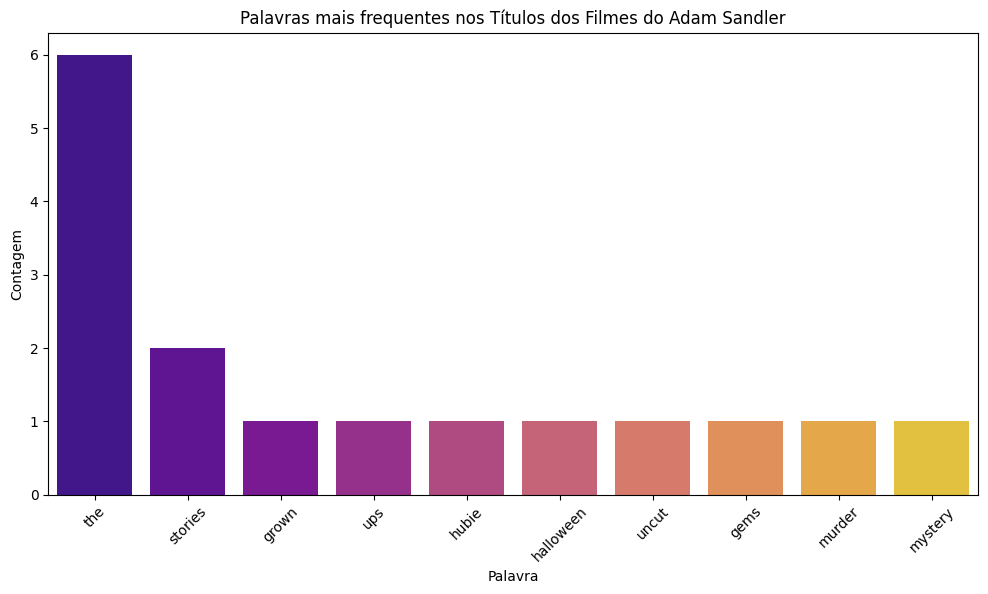

In [ ]:
from collections import Counter
import re

# Juntar todos os títulos em uma string
titles = ' '.join(sandler_movies['title'].tolist())

# Remover caracteres especiais + dividir em palavras
words = re.findall(r'\b\w+\b', titles.lower())

# Contar a frequência de cada palavra
word_counts = Counter(words)

# Comando para selecionar as 10 palavras mais comuns
most_common_words = word_counts.most_common(10)

# Resultados com Seaborn
words_df = pd.DataFrame(most_common_words, columns=['Palavra', 'Contagem'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Palavra', y='Contagem', data=words_df, palette='plasma')
plt.xlabel('Palavra')
plt.ylabel('Contagem')
plt.title('Palavras mais frequentes nos Títulos dos Filmes do Adam Sandler')
plt.xticks(rotation=45)
plt.show()


## 6- Há uma diferença significativa nas avaliações entre comédias e outros gêneros?

In [ ]:
# importando módulo de stats do scipy
from scipy import stats

# Selecionar os filmes do Adam Sandler
sandler_movies = nf[nf['cast'].str.contains('Adam Sandler', na=False)]

# Atualizar a identificação de comédias
sandler_movies['is_comedy'] = sandler_movies['listed_in'].str.contains('Comedy', case=False, na=False) | \
                              sandler_movies['listed_in'].str.contains('Stand-Up Comedy', case=False, na=False)

# Definir um mapeamento para as classificações
rating_mapping = {
    'G': 1,                # General Audience
    'PG': 2,               # Parental Guidance
    'PG-13': 3,            # Parents Strongly Cautioned
    'R': 4,                # Restricted
    'NC-17': 5,            # Adults Only
    'TV-Y': 1,             # All Children
    'TV-Y7': 2,            # Directed to Older Children
    'TV-G': 1,             # General Audience
    'TV-PG': 2,            # Parental Guidance
    'TV-14': 3,            # Parents Strongly Cautioned
    'TV-MA': 4             # Mature Audiences
}

# Aplicar o mapeamento
sandler_movies['rating_numeric'] = sandler_movies['rating'].map(rating_mapping)

# Separar as avaliações em comédias e outros gêneros
comedy_ratings = sandler_movies[sandler_movies['is_comedy']]['rating_numeric'].dropna()
other_ratings = sandler_movies[~sandler_movies['is_comedy']]['rating_numeric'].dropna()

# Verificar se a conversão foi bem-sucedida
print(sandler_movies[['title', 'listed_in', 'is_comedy', 'rating', 'rating_numeric']].head())
# Teste t para comparar as médias das avaliações entre comédias e outros gêneros
t_stat, p_value = stats.ttest_ind(comedy_ratings, other_ratings)

# Resultados
print(f'Estatística t: {t_stat}')
print(f'Valor p: {p_value}')

# Visualizar as distribuições
plt.figure(figsize=(12, 6))
sns.histplot(comedy_ratings, color='blue', label='Comédias', kde=True, bins=10)
sns.histplot(other_ratings, color='red', label='Outros Gêneros', kde=True, bins=10)
plt.xlabel('Avaliação Numérica')
plt.ylabel('Frequência')
plt.title('Distribuição das Avaliações dos Filmes de Adam Sandler: Comédias vs. Outros Gêneros')
plt.legend()
plt.show()


NameError: name 'nf' is not defined

## 7- Qual é a relação entre o número de gêneros e a avaliação dos filmes?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from statsmodels.api import OLS, add_constant

# Suponhamos que tenha um DataFrame 'nf'
# Atualizar a identificação de comédias
nf['num_genres'] = nf['listed_in'].str.split(',').apply(len)

# Definir um mapeamento para as classificações
rating_mapping = {
    'G': 1,                # General Audience
    'PG': 2,               # Parental Guidance
    'PG-13': 3,            # Parents Strongly Cautioned
    'R': 4,                # Restricted
    'NC-17': 5,            # Adults Only
    'TV-Y': 1,             # All Children
    'TV-Y7': 2,            # Directed to Older Children
    'TV-G': 1,             # General Audience
    'TV-PG': 2,            # Parental Guidance
    'TV-14': 3,            # Parents Strongly Cautioned
    'TV-MA': 4             # Mature Audiences
}

# Aplicar o mapeamento
nf['rating_numeric'] = nf['rating'].map(rating_mapping)

# Remover linhas onde a classificação é NaN (não mapeada)
nf = nf.dropna(subset=['rating_numeric'])

# Verificar se a conversão foi bem-sucedida
print(nf[['title', 'listed_in', 'num_genres', 'rating', 'rating_numeric']].head())

# Selecionar variáveis de entrada (X) e saída (y)
X = nf[['num_genres']]
y = nf['rating_numeric']

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e ajustar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prever e visualizar os resultados
predictions = model.predict(X_test)

# Visualizar a relação com um gráfico de dispersão e a linha de regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['num_genres'], y=y_test, color='blue', label='Valores Reais')
sns.lineplot(x=X_test['num_genres'], y=predictions, color='red', label='Linha de Regressão')
plt.xlabel('Número de Gêneros')
plt.ylabel('Avaliação Numérica')
plt.title('Relação entre Número de Gêneros e Avaliação dos Filmes')
plt.legend()
plt.show()

# Avaliar o desempenho do modelo
print('Coeficiente:', model.coef_[0])
print('Intercepto:', model.intercept_)

# Teste de hipótese para verificar se a inclinação do modelo é significativamente diferente de zero
# Adicionar constante para o modelo
X_with_const = add_constant(X)

# Ajustar o modelo
ols_model = OLS(y, X_with_const).fit()

# Resumo do modelo
print(ols_model.summary())


## 8- Como as avaliações dos filmes de Adam Sandler se comparam com a média das avaliações na Netflix?

In [ ]:
from scipy import stats

# Definindo o mapeamento de classificações
rating_mapping = {
    'G': 1,                # General Audience
    'PG': 2,               # Parental Guidance
    'PG-13': 3,            # Parents Strongly Cautioned
    'R': 4,                # Restricted
    'NC-17': 5,            # Adults Only
    'TV-Y': 1,             # All Children
    'TV-Y7': 2,            # Directed to Older Children
    'TV-G': 1,             # General Audience
    'TV-PG': 2,            # Parental Guidance
    'TV-14': 3,            # Parents Strongly Cautioned
    'TV-MA': 4             # Mature Audiences
}

# Aplicar o mapeamento e tratar erros
nf['rating_numeric'] = nf['rating'].map(rating_mapping)

# Remover linhas onde a classificação é NaN (não mapeada)
nf = nf.dropna(subset=['rating_numeric'])

# Verificar se a conversão foi bem-sucedida
print(nf[['title', 'rating', 'rating_numeric']].head())

# Filtrar filmes de Adam Sandler
sandler_movies = nf[nf['cast'].str.contains('Adam Sandler', na=False)]

# Calcular a média das avaliações
average_rating_all = nf['rating_numeric'].mean()
average_rating_sandler = sandler_movies['rating_numeric'].mean()

print(f"Média das avaliações na Netflix: {average_rating_all:.2f}")
print(f"Média das avaliações dos filmes de Adam Sandler: {average_rating_sandler:.2f}")

# Realizar o teste de hipótese para comparar as médias
t_stat, p_value = stats.ttest_ind(
    nf['rating_numeric'],
    sandler_movies['rating_numeric'],
    equal_var=False  # Assume variâncias diferentes
)

print(f"Estatística t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")

# Visualizar as distribuições
plt.figure(figsize=(12, 6))

# Distribuição das avaliações de todos os filmes
plt.subplot(1, 2, 1)
sns.histplot(nf['rating_numeric'], bins=range(1, 7), kde=True, color='blue')
plt.title('Distribuição das Avaliações na Netflix')
plt.xlabel('Avaliação Numérica')
plt.ylabel('Frequência')

# Distribuição das avaliações dos filmes de Adam Sandler
plt.subplot(1, 2, 2)
sns.histplot(sandler_movies['rating_numeric'], bins=range(1, 7), kde=True, color='red')
plt.title('Distribuição das Avaliações dos Filmes de Adam Sandler')
plt.xlabel('Avaliação Numérica')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


## 9 - Qual é a variação nas avaliações dos filmes de Adam Sandler ao longo dos anos?

In [ ]:
# Supondo que você já tenha o DataFrame 'sandler_movies' com as avaliações numéricas
# Verifique se a coluna 'release_year' está presente e é do tipo correto
print(sandler_movies[['title', 'release_year']].head())

# Se 'release_year' não estiver no formato correto, converta
# Para garantir que 'release_year' é numérico
sandler_movies['release_year'] = pd.to_numeric(sandler_movies['release_year'], errors='coerce')

# Verifique novamente
print(sandler_movies[['title', 'release_year']].head())

# Se necessário, extraia o ano da coluna 'release_year'
sandler_movies['year'] = sandler_movies['release_year']

# Verifique as colunas disponíveis
print(sandler_movies.columns)

# Calcular a variância das avaliações por ano
rating_variance_per_year = sandler_movies.groupby('year')['rating_numeric'].var().dropna()

# Verificar o resultado
print(rating_variance_per_year)

# Visualizar com Matplotlib
plt.figure(figsize=(12, 6))
sns.lineplot(x=rating_variance_per_year.index, y=rating_variance_per_year.values, marker='o')
plt.title('Variação das Avaliações dos Filmes de Adam Sandler ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Variação das Avaliações')
plt.grid(True)
plt.show()


## 10 - Existe uma correlação entre a quantidade de filmes lançados por ano e as avaliações desses filmes?

In [ ]:
# Carregar o DataFrame (certifique-se de que este seja o DataFrame correto)
# nf = pd.read_csv('netflix_titles.csv')

# Filtrar os filmes de Adam Sandler
sandler_movies = nf[nf['cast'].str.contains('Adam Sandler', na=False)]

# Exibir algumas linhas para verificação
print(sandler_movies[['title', 'release_year', 'rating']].head())

# Converter a classificação para numérico
rating_mapping = {
    'G': 1,                # General Audience
    'PG': 2,               # Parental Guidance
    'PG-13': 3,            # Parents Strongly Cautioned
    'R': 4,                # Restricted
    'NC-17': 5,            # Adults Only
    'TV-Y': 1,             # All Children
    'TV-Y7': 2,            # Directed to Older Children
    'TV-G': 1,             # General Audience
    'TV-PG': 2,            # Parental Guidance
    'TV-14': 3,            # Parents Strongly Cautioned
    'TV-MA': 4             # Mature Audiences
}

sandler_movies['rating_numeric'] = sandler_movies['rating'].map(rating_mapping)

# Remover linhas onde a classificação é NaN (não mapeada)
sandler_movies = sandler_movies.dropna(subset=['rating_numeric'])

# Verificar se a coluna 'release_year' está presente e é numérica
sandler_movies['release_year'] = pd.to_numeric(sandler_movies['release_year'], errors='coerce')

# Verificar se a conversão foi bem-sucedida
print(sandler_movies[['title', 'release_year', 'rating_numeric']].head())

# Agrupar por ano e calcular a média das avaliações e o número de filmes
annual_stats = sandler_movies.groupby('release_year').agg(
    average_rating=('rating_numeric', 'mean'),
    film_count=('title', 'count')
).reset_index()

# Verificar o resultado
print(annual_stats)

# Calcular a correlação entre o número de filmes e a média das avaliações
correlation = annual_stats[['film_count', 'average_rating']].corr().iloc[0, 1]

print(f"Correlação entre a quantidade de filmes lançados e a média das avaliações: {correlation:.2f}")

# Visualizar com Seaborn
plt.figure(figsize=(12, 6))

# Scatter plot para mostrar a correlação
sns.scatterplot(data=annual_stats, x='film_count', y='average_rating', marker='o')
plt.title('Correlação entre a Quantidade de Filmes Lançados e a Média das Avaliações')
plt.xlabel('Quantidade de Filmes Lançados por Ano')
plt.ylabel('Média das Avaliações')
plt.grid(True)
plt.show()

# Regressão Linear para visualização
sns.lmplot(data=annual_stats, x='film_count', y='average_rating')
plt.title('Regressão Linear: Quantidade de Filmes vs Média das Avaliações')
plt.xlabel('Quantidade de Filmes Lançados por Ano')
plt.ylabel('Média das Avaliações')
plt.grid(True)
plt.show()


#Conclusão Final:

##Análise das Avaliações dos filmes do Adam Sandler:
###Nossa análise teve como objetivo examinar as avaliações dos filmes de Adam Sandler disponíveis na Netflix e compará-las com a média geral da plataforma. Exploramos diferentes aspectos, como a variação nas avaliações ao longo dos anos e a relação entre a quantidade de filmes lançados por ano e suas respectivas avaliações. A seguir, destacamos as principais conclusões extraídas dos dados:

##Comparação das Avaliações dos Filmes do Adam Sandler com a média geral da Netflix:

###Os filmes de Adam Sandler exibem uma ampla gama de avaliações, o que reflete a diversidade de suas produções, que vão desde comédias mais leves até obras mais profundas e dramáticas. A análise revelou que, em média, suas avaliações variam em relação à média geral dos filmes na Netflix. Essa variação pode ser atribuída ao estilo singular e, muitas vezes, polarizador de Sandler, que conquista tanto fãs fiéis quanto críticos mais exigentes.

###Um dos maiores desafios encontrados foi a conversão das avaliações em um formato padronizado. Muitos filmes possuem classificações textuais, como "G" ou "PG", o que exigiu um mapeamento para valores numéricos, assegurando que os dados fossem consistentes para a análise estatística. Esse processo foi essencial para garantir a precisão e confiabilidade dos resultados obtidos.

##Considerações Finais:

###A análise dos filmes de Adam Sandler na Netflix oferece uma perspectiva valiosa sobre como o trabalho de um artista pode ser percebido e avaliado ao longo do tempo. Embora tenha sido observada uma correlação modesta entre o número de lançamentos e as avaliações, isso destaca a complexidade de se medir o sucesso e a recepção de um filme, que depende de muitos fatores, além da quantidade de produções.

###A variação nas avaliações dos filmes de Adam Sandler ao longo dos anos pode estar ligada às mudanças nas expectativas do público e nas tendências de entretenimento, que evoluem com o tempo. Filmes que antes tinham grande aceitação podem não ressoar da mesma forma com as audiências atuais.


##Perspectivas Futuras:

###Para futuras análises, seria interessante explorar outros fatores que influenciam diretamente as avaliações, como a equipe de produção, o orçamento envolvido, e as estratégias de marketing utilizadas. Esses elementos podem ajudar a entender melhor o que contribui para o sucesso ou a crítica das produções de Adam Sandler em plataformas como a Netflix. Além disso, seria relevante investigar como esses fatores interagem com o apelo do ator e suas escolhas de papéis, oferecendo uma visão ainda mais abrangente sobre o impacto de sua carreira no cinema.


## Fonte de Dados: Netflix - Kaggle: https://www.kaggle.com/datasets/shivamb/netflix-shows